In [23]:
import tkinter as tk 
from tkinter import messagebox
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('USA_Housing.csv')
data = df.drop('Address', axis=1)

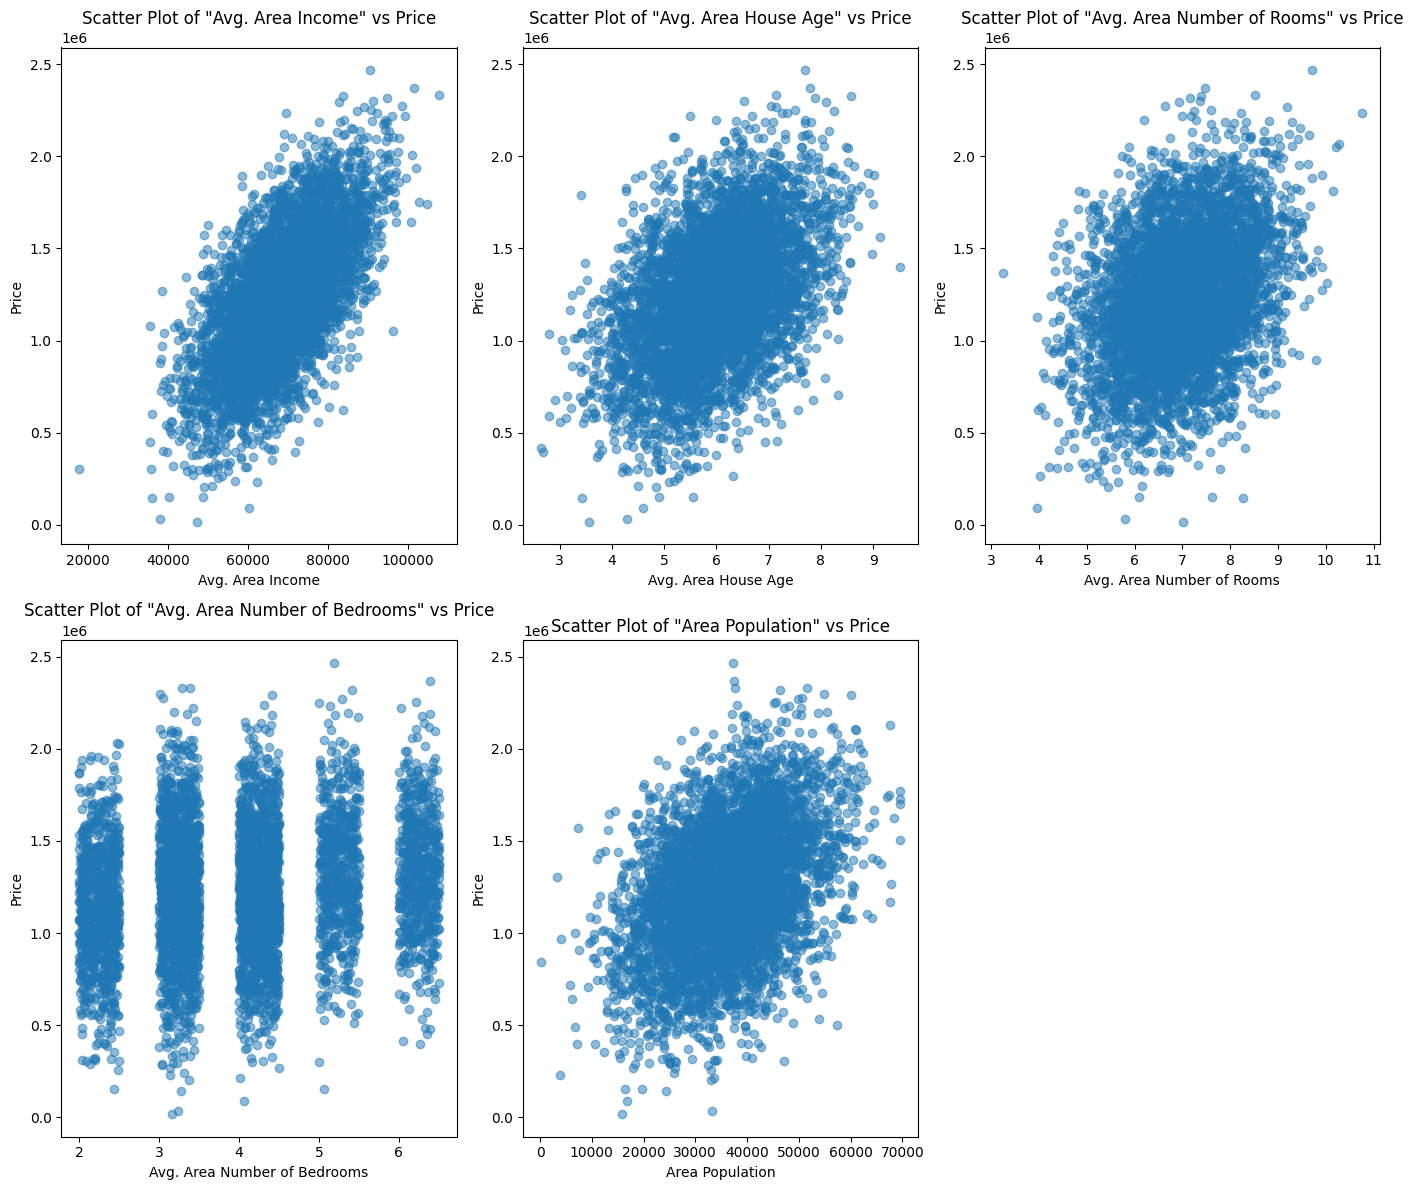

In [27]:
# Biểu đồ phân tán giữa các thuộc tính và giá nhà
plt.figure(figsize=(14, 12))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    plt.scatter(data[column], data['Price'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of "{column}" vs Price')
plt.tight_layout()
plt.show()


In [28]:
data = np.array(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].values)
dt_Train, dt_Test = train_test_split(data, test_size=0.3, shuffle=True)

x_train = dt_Train[:,:-1]
y_train = dt_Train[:,-1]
x_test = dt_Test[:,:-1]
y_test = dt_Test[:,-1]

In [29]:
lr = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [31]:
y_pred = lr.predict(x_test)

r2_test = r2_score(y_test, y_pred)
nse_test = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = sqrt(mean_squared_error(y_test, y_pred))


print(f"Đánh giá mô hình trên tập kiểm tra:\n")
print(f"R2: {r2_test}")
print(f"Mean squared error (MSE): {nse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")

Đánh giá mô hình trên tập kiểm tra:

R2: 0.9112000303256692
Mean squared error (MSE): 0.9112000303256692
Mean Absolute Error (MAE): 82666.14250846358
Root Mean Squared Error (RMSE): 103735.10914552897


In [33]:
# Hàm dự đoán giá khi nhấn nút "Dự đoán"
def predict_price():
    try:
        # Lấy dữ liệu từ các ô nhập trên giao diện và chuyển đổi thành số
        income = float(entry_boxes[0].get())
        age = float(entry_boxes[1].get())
        rooms = float(entry_boxes[2].get())
        bedrooms = float(entry_boxes[3].get())
        population = float(entry_boxes[4].get())
        
        # Dự đoán giá nhà
        predicted_price = lr.predict([[income, age, rooms, bedrooms, population]])[0]

        # Hiển thị kết quả dự đoán trên giao diện với định dạng 2 chữ số thập phân
        result_label.config(text=f"Giá nhà dự đoán: ${predicted_price:.2f}")
        
        # Đánh giá mô hình và hiển thị kết quả
        mae_value = mean_absolute_error(y_test, y_pred)
        rmse_value = sqrt(mean_squared_error(y_test, y_pred))

    except Exception as e:
        messagebox.showerror("Lỗi", "Nhập dữ liệu không hợp lệ!")

# Tạo giao diện
root = tk.Tk()
root.title("Dự đoán giá nhà")

# Tạo các nhãn và ô nhập cho các thuộc tính của mẫu mới
attributes = ['Trung bình thu nhập khu vực', 'Trung bình tuổi nhà', 'Trung bình số phòng', 'Trung bình số phòng ngủ', 'Tổng số dân cư']
entry_boxes = []
for i, attribute in enumerate(attributes):
    label = tk.Label(root, text=f"{attribute}:")
    label.grid(row=i, column=0, padx=10, pady=10)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=10)
    entry_boxes.append(entry)

# Nút dự đoán
predict_button = tk.Button(root, text="Dự đoán", command=predict_price)
predict_button.grid(row=len(attributes), column=0, columnspan=2, pady=10)

# Nhãn hiển thị kết quả dự đoán
result_label = tk.Label(root, text="")
result_label.grid(row=len(attributes) + 1, column=0, columnspan=2, pady=10)

# Nhãn hiển thị độ đo đánh giá chất lượng mô hình
mae_label = tk.Label(root, text=f"MAE: {mean_absolute_error(y_test, y_pred)}")
mae_label.grid(row=len(attributes) + 2, column=0, columnspan=2, pady=10)

rmse_label = tk.Label(root, text=f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
rmse_label.grid(row=len(attributes) + 3, column=0, columnspan=2, pady=10)

root.mainloop()